## Decision Tree (and Forest) on Moons
First part is pretty simple.. train a decision tree on the moons dataset from Scikit-learn. Then we create an ad hoc forest to look for a performance increase.

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

#Collect and split data

X, y = make_moons(n_samples=10000, noise=.4)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

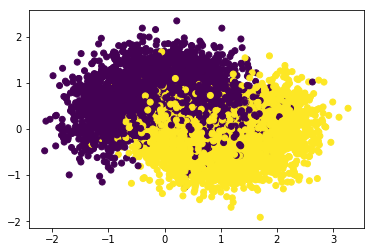

In [6]:
import matplotlib.pyplot as plt

#View data

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Train model

params = {
    'max_depth':[2,4,8,20],
    'min_samples_split':[2,5,10,20,40],
    'min_samples_leaf':[1,2,5,10,20],
    'max_leaf_nodes':[2,5,10,100,None]
}

clf = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 4, 8, 20], 'min_samples_split': [2, 5, 10, 20, 40], 'min_samples_leaf': [1, 2, 5, 10, 20], 'max_leaf_nodes': [2, 5, 10, 100, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [4]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [5]:
from sklearn.metrics import accuracy_score

#View Performance!

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8605

## Forest

In [ ]:
from sklearn.model_selection import ShuffleSplit

#Split up data into small sets

splitter = ShuffleSplit(n_splits=1000, test_size=len(X_train) - n_instances)

sets = []

for train_index, test_index in splitter.split(X_train):
    sets.append((X_train[train_index], y_train[train_index]))